### Caroline Suwaki

O objetivo deste projeto foi criar um dashboard no Tableau para exibir um storytelling com os dados. Os dados escolhidos foram as informações pessoais dos membros da equipe, sendo que as minhas foram obtidas do Strava, as do Demétrio Fragoso foram obtidas a partir do aplicativo Netflix e as do Ramon Brito foram obtidas via API  do Spotify. Neste notebook será desenvolvida a análise exploratória dos meus dados, que juntamente com os dados dos demais membros da equipe será utilizada para a construção de um dashboard no software Tableau.

Os dados do Strava foram obtidos via API, mas como a requisição continha dados sensíveis, optei por iniciar um novo notebook a partir dos dados limpos e prontos para serem explorados.





In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dados_colab/activities.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            95 non-null     int64  
 1   id                    95 non-null     int64  
 2   type                  95 non-null     object 
 3   name                  95 non-null     object 
 4   distance              95 non-null     float64
 5   moving_time           95 non-null     int64  
 6   elapsed_time          95 non-null     int64  
 7   total_elevation_gain  95 non-null     float64
 8   start_date            95 non-null     object 
 9   start_latitude        89 non-null     float64
 10  kilojoules            89 non-null     float64
 11  start_longitude       89 non-null     float64
 12  average_heartrate     0 non-null      float64
 13  max_heartrate         0 non-null      float64
 14  elev_high             89 non-null     float64
 15  elev_low              89 

In [ ]:
df.head()

,Unnamed: 0,id,type,name,distance,moving_time,elapsed_time,total_elevation_gain,start_date,start_latitude,kilojoules,start_longitude,average_heartrate,max_heartrate,elev_high,elev_low,average_speed,max_speed
0,0,3060037208,Ride,IO,5148.8,1842,24934,129.9,2020-01-31T13:14:08Z,-23.576906,127.0,-46.729584,NaN,NaN,786.5,727.9,2.795,13.0
1,1,3054776687,Ride,Pedalada no almoço,8599.0,2539,20953,134.9,2020-01-29T15:06:13Z,-23.577650,160.1,-46.721893,NaN,NaN,786.5,725.2,3.387,9.1
2,2,3048076815,Ride,Um sol pra cada um,9736.9,2620,3149,120.9,2020-01-27T14:09:59Z,-23.549847,185.5,-46.654109,NaN,NaN,831.2,723.1,3.716,12.2
3,3,3046384815,Ride,paulistando,3835.4,1198,7232,103.4,2020-01-26T17:52:34Z,-23.550089,100.6,-46.653992,NaN,NaN,855.8,797.0,3.202,9.4
4,4,3037836336,Ride,Uma chuva inesperada,2576.3,703,734,7.6,2020-01-23T23:35:32Z,-23.576958,31.9,-46.729506,NaN,NaN,765.0,725.7,3.665,7.5


In [ ]:
df.tail()

,Unnamed: 0,id,type,name,distance,moving_time,elapsed_time,total_elevation_gain,start_date,start_latitude,kilojoules,start_longitude,average_heartrate,max_heartrate,elev_high,elev_low,average_speed,max_speed
90,90,2180691080,Ride,Fugindo da chuva | Bloquinho surpresa | vespas.bg,17571.8,6197,9185,418.6,2019-02-27T23:46:11Z,-23.549815,488.1,-46.653984,NaN,NaN,852.1,748.0,2.836,15.0
91,91,2170385473,Ride,Voltando da Baguerinha não fui stravada,4700.0,1740,1740,0.0,2019-02-23T21:08:21Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.701,0.0
92,92,2168044489,Ride,Visitando a Baguerinha,4658.3,1721,2290,67.2,2019-02-22T23:52:56Z,-23.571258,102.2,-46.707946,NaN,NaN,778.8,726.3,2.707,8.3
93,93,2163958813,Ride,Finalmente funcionou essa merda | vespas bg,23193.6,5686,8741,505.1,2019-02-21T00:27:42Z,-23.556346,572.5,-46.662288,NaN,NaN,856.0,721.8,4.079,13.2
94,94,2158801655,Ride,Butantã x Consolação,14000.0,7200,7200,0.0,2019-02-17T17:00:29Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.944,0.0


## Transformando start_date (object) pra datetime.


In [ ]:
df["start_date"]= pd.to_datetime(df["start_date"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   Unnamed: 0            95 non-null     int64              
 1   id                    95 non-null     int64              
 2   type                  95 non-null     object             
 3   name                  95 non-null     object             
 4   distance              95 non-null     float64            
 5   moving_time           95 non-null     int64              
 6   elapsed_time          95 non-null     int64              
 7   total_elevation_gain  95 non-null     float64            
 8   start_date            95 non-null     datetime64[ns, UTC]
 9   start_latitude        89 non-null     float64            
 10  kilojoules            89 non-null     float64            
 11  start_longitude       89 non-null     float64            
 12  average_he

## Transformando a distância (metros) em km.

In [ ]:
df['distance'] = df['distance']/1000 

## Separando dia-mes-ano.

In [ ]:
df['month'] = df['start_date'].dt.month
df['day'] = df['start_date'].dt.day
df['hour'] = df['start_date'].dt.hour
df['day_name'] = df['start_date'].apply(lambda x: x.day_name()) 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   Unnamed: 0            95 non-null     int64              
 1   id                    95 non-null     int64              
 2   type                  95 non-null     object             
 3   name                  95 non-null     object             
 4   distance              95 non-null     float64            
 5   moving_time           95 non-null     int64              
 6   elapsed_time          95 non-null     int64              
 7   total_elevation_gain  95 non-null     float64            
 8   start_date            95 non-null     datetime64[ns, UTC]
 9   start_latitude        89 non-null     float64            
 10  kilojoules            89 non-null     float64            
 11  start_longitude       89 non-null     float64            
 12  average_he

## Separando horas de datas.

In [ ]:
df['just_date'] = df['start_date'].dt.date
df['just_date'] 

0     2020-01-31
1     2020-01-29
2     2020-01-27
3     2020-01-26
4     2020-01-23
         ...    
90    2019-02-27
91    2019-02-23
92    2019-02-22
93    2019-02-21
94    2019-02-17
Name: just_date, Length: 95, dtype: object

## Transformando just_date (obj) pra data e setando como index.

In [ ]:
df["just_date"]= pd.to_datetime(df["just_date"]) 

In [ ]:
df.set_index('just_date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95 entries, 2020-01-31 to 2019-02-17
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   Unnamed: 0            95 non-null     int64              
 1   id                    95 non-null     int64              
 2   type                  95 non-null     object             
 3   name                  95 non-null     object             
 4   distance              95 non-null     float64            
 5   moving_time           95 non-null     int64              
 6   elapsed_time          95 non-null     int64              
 7   total_elevation_gain  95 non-null     float64            
 8   start_date            95 non-null     datetime64[ns, UTC]
 9   start_latitude        89 non-null     float64            
 10  kilojoules            89 non-null     float64            
 11  start_longitude       89 non-null     float64        

 ## Analisando os dias da semana com mais atividades.

In [ ]:
dias = df.groupby(['day_name'])['id'].count() 

In [ ]:
dias.rename(index={'Monday':'Segunda', 'Tuesday': 'Terça', 'Wednesday': 'Quarta', 'Thursday': 'Quinta', 'Friday': 'Sexta', 'Saturday': 'Sábado', 'Sunday':'Domingo'}, inplace = True)
dias

day_name
Sexta      10
Segunda    14
Sábado      6
Domingo    10
Quinta     18
Terça      16
Quarta     21
Name: id, dtype: int64

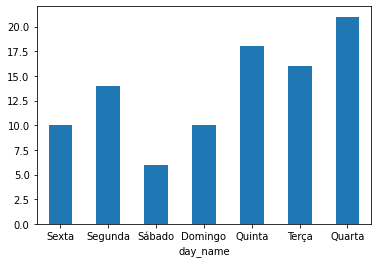

In [ ]:
dias.plot(kind='bar', rot=0); 

## Ganho de elevaçao total (em m) e por mês.

In [ ]:
elevacao = df.groupby(['month'])['total_elevation_gain'].sum() 
elevacao

month
1    2177.1
2     990.9
3    1839.6
4    3369.0
5    2974.0
6    4110.9
7    1438.5
8     823.7
Name: total_elevation_gain, dtype: float64

In [ ]:
elevacao.rename(index={2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho', 7:'Julho', 8: 'Agosto', 1:'Janeiro'}, inplace = True)
elevacao

month
Janeiro      2177.1
Fevereiro     990.9
Março        1839.6
Abril        3369.0
Maio         2974.0
Junho        4110.9
Julho        1438.5
Agosto        823.7
Name: total_elevation_gain, dtype: float64

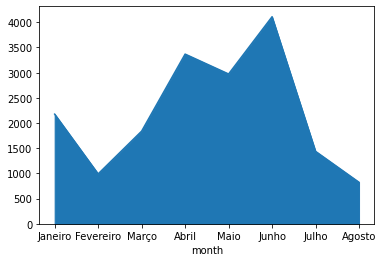

In [ ]:
ax = elevacao.plot.area() #ganho total de elevação por mês
ax;

In [ ]:
df.head()

,Unnamed: 0,id,type,name,distance,moving_time,elapsed_time,total_elevation_gain,start_date,start_latitude,kilojoules,start_longitude,average_heartrate,max_heartrate,elev_high,elev_low,average_speed,max_speed,month,day,hour,day_name
just_date,,,,,,,,,,,,,,,,,,,,,,
2020-01-31,0,3060037208,Ride,IO,5.1488,1842,24934,129.9,2020-01-31 13:14:08+00:00,-23.576906,127.0,-46.729584,NaN,NaN,786.5,727.9,2.795,13.0,1,31,13,Friday
2020-01-29,1,3054776687,Ride,Pedalada no almoço,8.5990,2539,20953,134.9,2020-01-29 15:06:13+00:00,-23.577650,160.1,-46.721893,NaN,NaN,786.5,725.2,3.387,9.1,1,29,15,Wednesday
2020-01-27,2,3048076815,Ride,Um sol pra cada um,9.7369,2620,3149,120.9,2020-01-27 14:09:59+00:00,-23.549847,185.5,-46.654109,NaN,NaN,831.2,723.1,3.716,12.2,1,27,14,Monday
2020-01-26,3,3046384815,Ride,paulistando,3.8354,1198,7232,103.4,2020-01-26 17:52:34+00:00,-23.550089,100.6,-46.653992,NaN,NaN,855.8,797.0,3.202,9.4,1,26,17,Sunday
2020-01-23,4,3037836336,Ride,Uma chuva inesperada,2.5763,703,734,7.6,2020-01-23 23:35:32+00:00,-23.576958,31.9,-46.729506,NaN,NaN,765.0,725.7,3.665,7.5,1,23,23,Thursday


## Tempo pedalado por mês (contando as paradas).

In [ ]:
df['elapsed_time'] = df['elapsed_time'].astype('float64')

df['elapsed_time'] = pd.to_datetime(df["elapsed_time"], unit='s').dt.strftime("%H:%M:%S") #transformando tempo em dd:hh:mm:ss

In [ ]:
df['elapsed_time'] = pd.to_timedelta(df.elapsed_time)

tempo_pedalado_por_mes = df.groupby(['month']).elapsed_time.sum()

In [ ]:
tempo_pedalado_por_mes.rename(index={2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho', 7:'Julho', 8: 'Agosto', 1:'Janeiro'}, inplace = True)
tempo_pedalado_por_mes

month
Janeiro     1 days 14:37:19
Fevereiro   0 days 08:05:56
Março       0 days 16:27:41
Abril       4 days 22:34:35
Maio        3 days 15:08:17
Junho       4 days 02:27:10
Julho       1 days 20:16:45
Agosto      0 days 08:20:10
Name: elapsed_time, dtype: timedelta64[ns]

In [ ]:
print(df.elapsed_time.max()) #pedalada maior tempo.


0 days 14:05:57


In [ ]:
print(df.elapsed_time.sum()) #soma total das pedaladas (incluindo paradas).

17 days 11:57:53


## Tempo pedalado por mês (apenas o período em movimento).

In [ ]:
df['moving_time'] = df['moving_time'].astype('float64') 

df['moving_time'] = pd.to_datetime(df["moving_time"], unit='s').dt.strftime("%H:%M:%S") #transformando tempo em hh:mm:ss

In [ ]:
df['moving_time'] = pd.to_timedelta(df.moving_time)

tempo_mov_por_mes = df.groupby(['month']).moving_time.sum()

In [ ]:
tempo_mov_por_mes.rename(index={2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho', 7:'Julho', 8: 'Agosto', 1:'Janeiro'}, inplace = True)
tempo_mov_por_mes

month
Janeiro     0 days 12:56:01
Fevereiro   0 days 06:15:44
Março       0 days 08:06:38
Abril       0 days 14:36:35
Maio        0 days 14:18:55
Junho       0 days 19:27:12
Julho       0 days 06:53:53
Agosto      0 days 03:31:23
Name: moving_time, dtype: timedelta64[ns]

In [ ]:
print(df.moving_time.max()) #maior tempo em movimentação

0 days 05:16:26


In [ ]:
print(df.moving_time.sum()) #tempo total em movimento

3 days 14:06:21


## Distância (km) pedalada por mês.

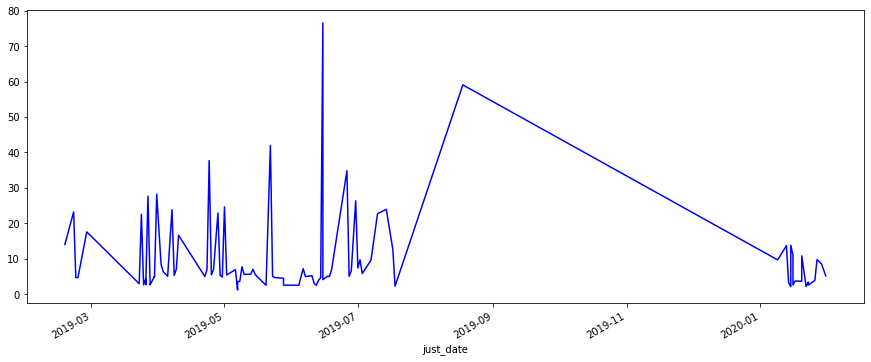

In [ ]:
df['distance'].plot(style=['b-'], figsize=(15,6));

## Distância máxima (km) percorrida em um dia

In [ ]:
dist_max = df['distance'].max() 
round(dist_max)

77

## Distância mínima (km) percorrida em um dia

In [ ]:
dis_min  = df['distance'].min() #Distância mínima (km) percorrida em um dia 
dis_min

1.1607

## Transformando kilojoules em calorias.

In [ ]:
df['kilojoules']= df['kilojoules']/4.19
df['kilojoules'] 

just_date
2020-01-31     30.310263
2020-01-29     38.210024
2020-01-27     44.272076
2020-01-26     24.009547
2020-01-23      7.613365
                 ...    
2019-02-27    116.491647
2019-02-23           NaN
2019-02-22     24.391408
2019-02-21    136.634845
2019-02-17           NaN
Name: kilojoules, Length: 95, dtype: float64

In [ ]:
cal = df.groupby(['month'])['kilojoules'].sum()
cal.rename(index={2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho', 7:'Julho', 8: 'Agosto', 1:'Janeiro'}, inplace = True)


## Calorias gastas por mês.

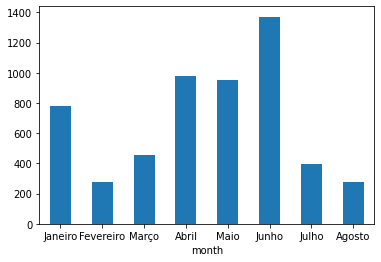

In [ ]:
cal.plot(kind='bar', rot=0);

## Analisando se há correlação entre variáveis.

In [ ]:
df.corr() 

,Unnamed: 0,id,distance,total_elevation_gain,start_latitude,kilojoules,start_longitude,average_heartrate,max_heartrate,elev_high,elev_low,average_speed,max_speed,month,day,hour
Unnamed: 0,1.000000,-0.887020,0.022332,0.028398,-0.126948,0.030385,-0.105936,NaN,NaN,0.061702,0.066508,-0.063701,0.066889,0.045454,0.074519,-0.030806
id,-0.887020,1.000000,-0.094910,-0.101578,0.063225,-0.086281,0.030414,NaN,NaN,0.035460,0.022407,-0.079730,-0.137624,-0.487744,0.058371,0.128144
distance,0.022332,-0.094910,1.000000,0.937945,0.155776,0.723352,0.135401,NaN,NaN,0.145536,-0.154358,0.450059,0.175588,0.186211,0.066591,0.010676
total_elevation_gain,0.028398,-0.101578,0.937945,1.000000,0.054218,0.716168,0.035209,NaN,NaN,0.273053,-0.060466,0.444335,0.333538,0.177558,0.096959,0.038111
start_latitude,-0.126948,0.063225,0.155776,0.054218,1.000000,0.063610,0.993862,NaN,NaN,-0.888889,-0.975168,-0.040255,-0.208926,0.092431,-0.020061,-0.002293
kilojoules,0.030385,-0.086281,0.723352,0.716168,0.063610,1.000000,0.045701,NaN,NaN,0.178656,-0.060643,-0.085906,0.244344,0.160452,-0.071289,-0.039321
start_longitude,-0.105936,0.030414,0.135401,0.035209,0.993862,0.045701,1.000000,NaN,NaN,-0.912854,-0.985604,-0.027447,-0.188670,0.127788,-0.033951,-0.034254
average_heartrate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max_heartrate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
elev_high,0.061702,0.035460,0.145536,0.273053,-0.888889,0.178656,-0.912854,NaN,NaN,1.000000,0.913577,0.151616,0.227639,-0.196020,0.106326,0.087508


## Existe relação entre a distância pedalada e as calorias gastas?

Correlação entre calorias gastas e distância é igual a 0.723.


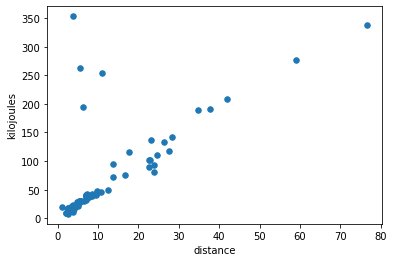

In [ ]:
df.plot.scatter(x = 'distance', y = 'kilojoules', s=30); 
corr_dis_k = df['distance'].corr(df['kilojoules'])
print(f'A correlação entre calorias gastas e distância é igual a {corr_dis_k:.3f}.')

## Existe relação entre a elevação do terreno e as calorias gastas?

A correlação entre calorias gastas e subidas é igual a 0.716.


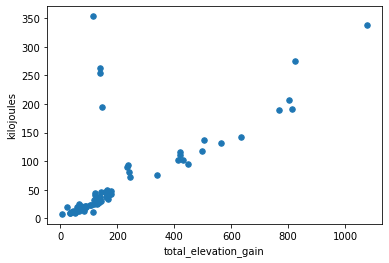

In [ ]:
df.plot.scatter(x = 'total_elevation_gain', y = 'kilojoules', s=30); #Existe relação entre o ganho de elevação (subidas) e as calorias gastas?
corr_teg_k = df['total_elevation_gain'].corr(df['kilojoules'])
print(f'A correlação entre calorias gastas e subidas é igual a {corr_teg_k:.3f}.')

## Média das velocidades médias.

In [ ]:
round(df['average_speed'].mean()) 

3